In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd
df = pd.read_csv('C:/Users/dlwnr/a/thesis_code/use.csv', index_col=0)

In [3]:
df

,sad,sex,money,age,school,jobhome,anxiety,sns
0,5,남,하강,46,대학교,경험 있음,비슷하다,0.428571
1,6,여,변호없음,59,대학교,경험 있음,커진다,10.000000
2,6,여,변호없음,67,대학교,일을 안함,커진다,5.000000
3,8,남,하강,63,대학교,경험 없음,커진다,5.000000
4,6,여,하강,37,대학교,경험 없음,비슷하다,7.000000
...,...,...,...,...,...,...,...,...
4995,10,남,해고 및 폐업,24,대학교,경험 있음,줄어든다,10.000000
4996,10,남,하강,20,대학교,일을 안함,커진다,5.000000
4997,6,여,변호없음,28,대학교,경험 있음,비슷하다,0.142857
4998,1,여,변호없음,51,대학교,경험 있음,커진다,3.000000


In [5]:
up = df[df['anxiety']=='커진다']
stable = df[df['anxiety']=='비슷하다']
down = df[df['anxiety']=='줄어든다']

In [6]:
up['sad'].describe()

count    1978.000000
mean        5.618301
std         2.250253
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: sad, dtype: float64

In [7]:
stable['sad'].describe()

count    2319.000000
mean        5.141440
std         2.209831
min         0.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: sad, dtype: float64

In [9]:
down['sad'].describe()

count    703.000000
mean       4.970128
std        2.332226
min        0.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       10.000000
Name: sad, dtype: float64

['NanumGothic']


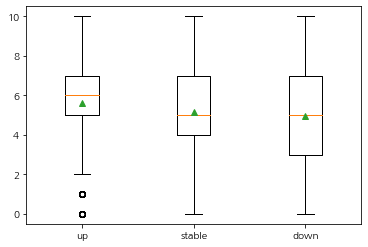

In [10]:
import matplotlib.pyplot as plt


# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.


plt.boxplot([up['sad'], stable['sad'], down['sad']],
    labels=['up', 'stable', 'down'], showmeans=True)
plt.show()


In [11]:
from scipy.stats import  shapiro

#정규성

print(shapiro(up['sad']))

print(shapiro(stable['sad']))

print(shapiro(down['sad']))





ShapiroResult(statistic=0.9471489191055298, pvalue=4.4863342437191184e-26)
ShapiroResult(statistic=0.9455634951591492, pvalue=1.8636954441643067e-28)
ShapiroResult(statistic=0.9592821598052979, pvalue=4.729088756878774e-13)


In [15]:
import pingouin as pg
pg.normality(up['sad'])

,W,pval,normal
sad,0.947149,4.486334e-26,False


In [12]:
#등분산성(levene)
from scipy.stats import  levene

levene(up['sad'],stable['sad'], down['sad'])

LeveneResult(statistic=2.652056242235961, pvalue=0.07060532499380492)

아노바

In [14]:
import pingouin as pg
pg.anova(dv = 'sad', between = 'anxiety', data = df)

,Source,ddof1,ddof2,F,p-unc,np2
0,anxiety,2,4997,33.284018,4.368881e-15,0.013146


In [17]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('sad ~ C(anxiety)',df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(anxiety),2.0,335.02223,167.511115,33.284018,4.368881e-15
Residual,4997.0,25148.79777,5.032779,NaN,NaN


사후분석


In [22]:
post=pg.pairwise_gameshowell(dv = 'sad', between = 'anxiety', data = df)
post

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,비슷하다,줄어든다,5.141440,4.970128,0.171312,0.099212,1.726728,1111.191093,1.956393e-01,0.074325
1,비슷하다,커진다,5.141440,5.618301,-0.476861,0.068307,-6.981194,4164.104533,7.890466e-12,-0.213635
2,줄어든다,커진다,4.970128,5.618301,-0.648173,0.101475,-6.387504,1196.859599,7.221314e-10,-0.280393


In [27]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(df.sad, df.anxiety)
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
비슷하다,줄어든다,1.7772,0.0756,0.2269,False
비슷하다,커진다,-6.9912,0.0,0.0,True
줄어든다,커진다,-6.4971,0.0,0.0,True


In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

hsd = pairwise_tukeyhsd(df['sad'], df['anxiety'], alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
비슷하다,줄어든다,-0.1713,0.1786,-0.3978,0.0551,False
비슷하다,커진다,0.4769,0.0,0.3159,0.6378,True
줄어든다,커진다,0.6482,0.0,0.4172,0.8791,True


회귀모형

In [28]:

import statsmodels.formula.api as sm 


model = sm.ols(formula = 'sad ~ anxiety',data=df).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sad   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     33.28
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           4.37e-15
Time:                        11:09:15   Log-Likelihood:                -11133.
No. Observations:                5000   AIC:                         2.227e+04
Df Residuals:                    4997   BIC:                         2.229e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.1414      0.047    110.365      0.000       5.050       5.233
anxiety[T.줄어든다]    -0.1713      0.097     -1.774      0.076      -0.361       0.018
anxiety[T.커진다]      0.4769      0.069      6.945      0.000       0.342       0.611
==============================================================================
Omnibus:                      220.973   Durbin-Watson:                   1.450
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.638
Skew:                          -0.527   Prob(JB):                     1.24e-53
Kurtosis:                       2.761   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""